In [25]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import sqlite3
import taxis
from utils import *
from visualize import *


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
DBNAME="taxis.db"
LAT=1.380766
LON=103.891675
LAT1=1.303693
LON1=103.844952
x,y = get_grid_cell(LAT,LON,20)
x1,y1 = get_grid_cell(LAT1,LON1,20)
print x,y
print x1,y1


24 12
20 5


In [9]:
data=taxis.fetch_grid_by_date(DBNAME,"20170627")

In [10]:
df = pd.DataFrame(data)
df.columns=['time','x','y','taxicount']

In [11]:
df.head()


,time,x,y,taxicount
0,0000,0,0,0
1,0000,1,0,0
2,0000,2,0,0
3,0000,3,0,0
4,0000,4,0,0


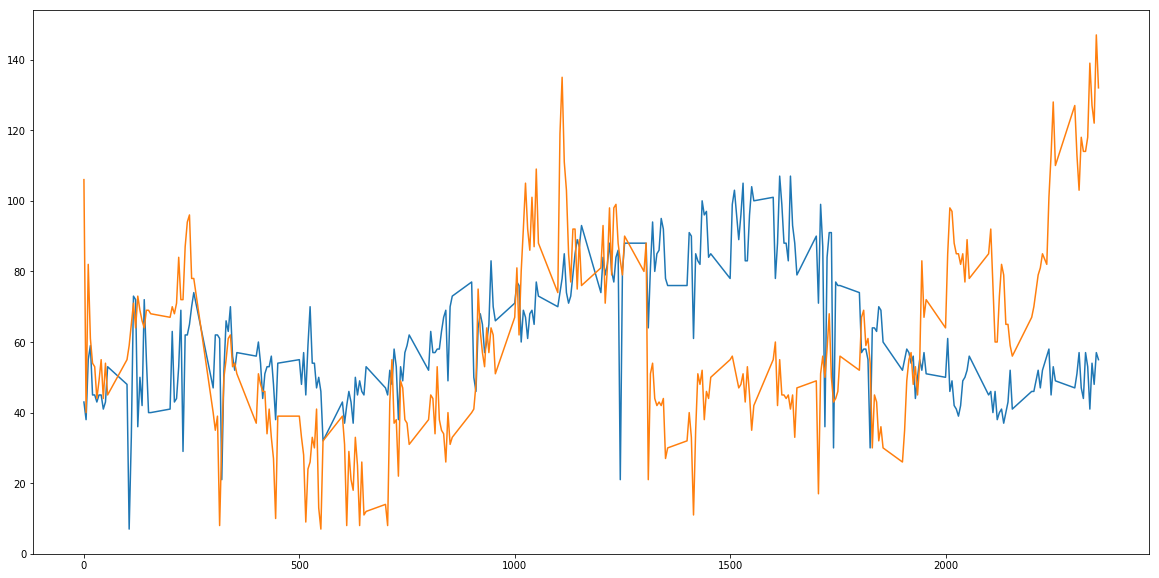

In [24]:
d1=df.query('x==20 and y==12')
x=d1['time'].tolist()
y=d1['taxicount'].tolist()
d2=df.query('x==20 and y==5')
x1=d2['time'].tolist()
y1=d2['taxicount'].tolist()
plot_data([(x,y),(x1,y1)])


280


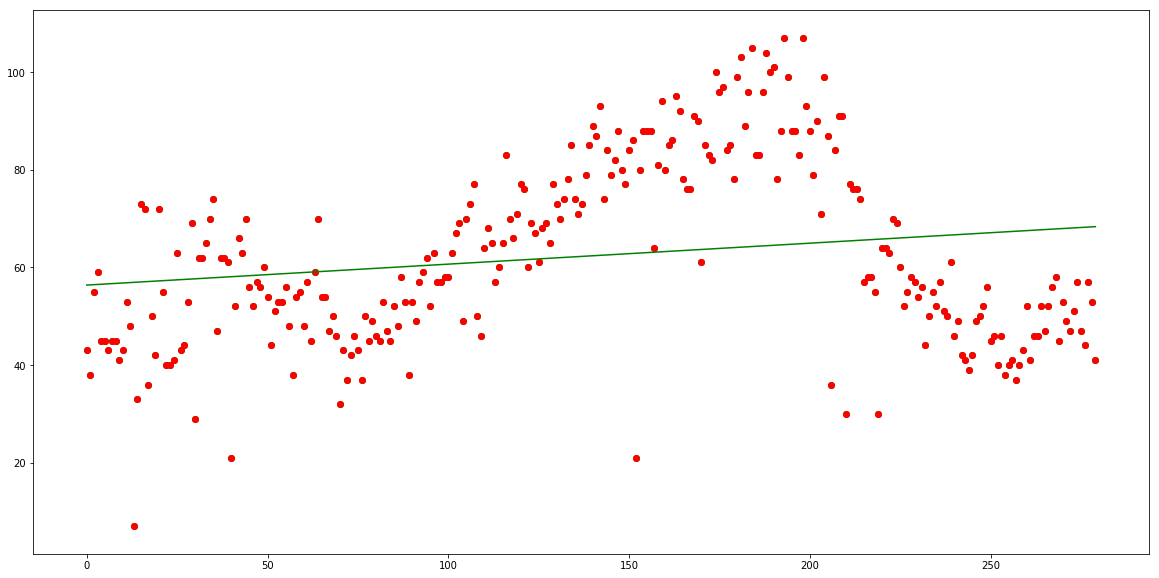

In [29]:
from sklearn.linear_model import LinearRegression

X = np.array(range(280))
y = (df.query('x==20 and y==12').head(280)['taxicount']).as_matrix()

print len(y)

X=X.reshape(-1,1)

model = LinearRegression()
model.fit(X, y)

X_predict=np.array([281,282]).reshape(-1,1)

plot_model(X,y,model)


In [27]:
by_hour = taxis.fetch_loc_by_time("taxis.db","0855",LAT,LON)
df_hour = pd.DataFrame(by_hour)
df_hour.columns=['Date','X','Y','TaxiCount']
df_hour['Date']=pd.to_datetime(df_hour['Date'])
df_hour

,Date,X,Y,TaxiCount
0,2017-06-25,24,12,40
1,2017-06-26,24,12,60
2,2017-06-27,24,12,18
3,2017-06-28,24,12,15


[0 1 2 3]


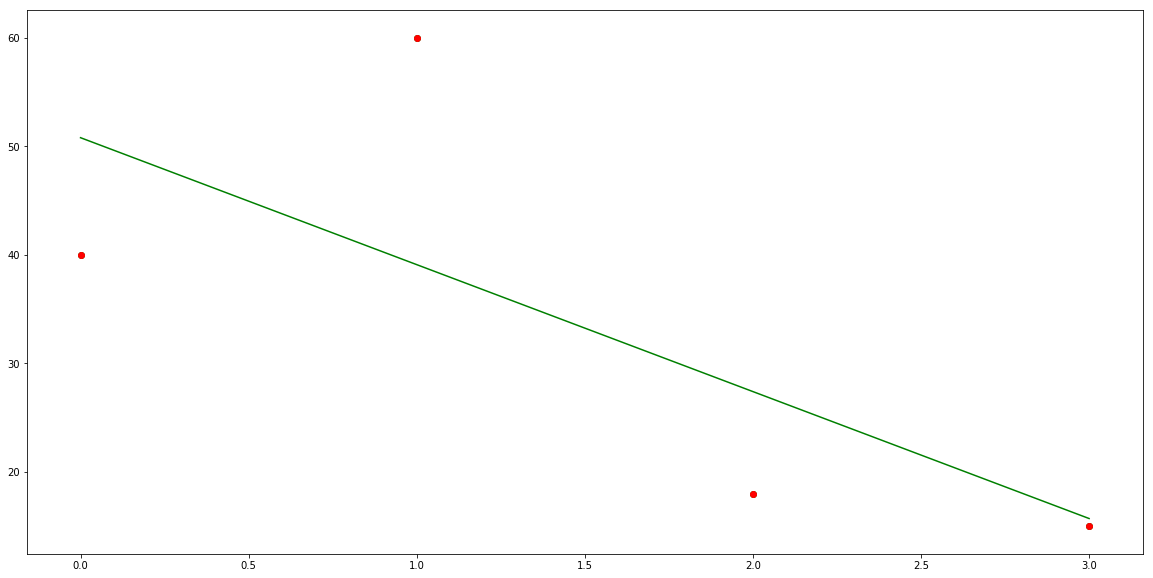

In [30]:
import datetime
X = np.array(range(4))
y = (df_hour.head(4)['TaxiCount']).as_matrix()

print X

X=X.reshape(-1,1)

model = LinearRegression()
model.fit(X, y)

X_predict=np.array([2]).reshape(-1,1)



plot_model(X,y,model)

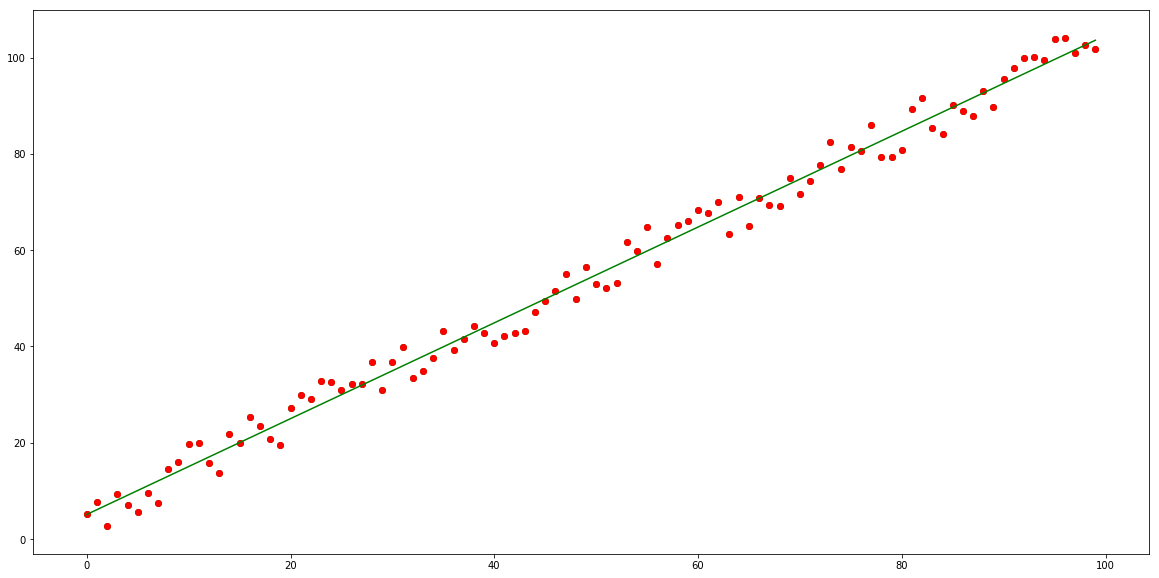

In [32]:
import random
X = np.array(range(100))
y = np.array([x+random.random()*10 for x in range(100)])


X=X.reshape(-1,1)

model = LinearRegression()
model.fit(X, y)

X_predict=np.array([50,101]).reshape(-1,1)


plot_model(X,y,model)